# Project-5 Temperature forecast project

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing CSV file

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [4]:
df.shape

(7752, 25)

Observation:

The dataset contains 7752 Rows And 25 columns

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Observation:

1.All variable are Numerical in nature.

2.Next_Tmax and Next_Tmin are Target Variable.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


# Checking Duplicate Values

In [7]:
df.duplicated().sum()

0

Observation:

The dataset contains no duplicate values

# Null Values

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Observation:

Except 5 columns all the variables contains null values

<AxesSubplot:>

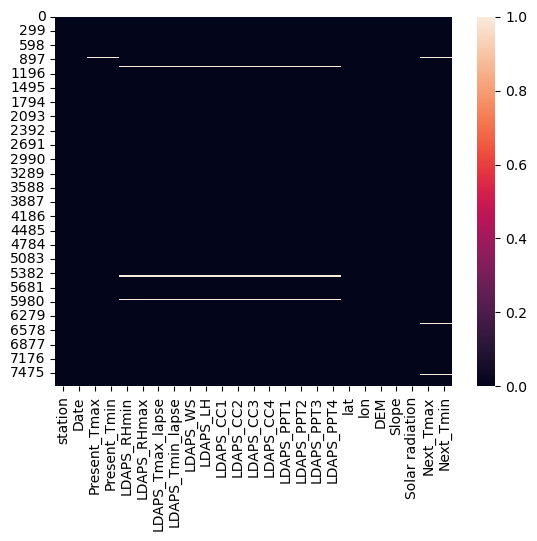

In [9]:
sns.heatmap(df.isnull())

In [10]:
print("We had {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))

We had 7752 Rows and 25 Columns before dropping null values.
We have 7588 Rows and 25 Columns after dropping null values.


In [11]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


# Statistical Summary

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7588.0,13.014101,7.217858,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7588.0,29.748366,2.967401,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7588.0,23.195809,2.400880,11.300000,21.600000,23.400000,24.800000,29.900000
LDAPS_RHmin,7588.0,56.724969,14.626559,19.794666,45.960243,55.023199,67.115099,98.524734
LDAPS_RHmax,7588.0,88.360823,7.199456,58.936283,84.203724,89.784122,93.742725,100.000153
LDAPS_Tmax_lapse,7588.0,29.620128,2.943496,17.624954,27.673756,29.709537,31.711109,38.542255
LDAPS_Tmin_lapse,7588.0,23.511786,2.342579,14.272646,22.086820,23.758249,25.155660,29.619342
LDAPS_WS,7588.0,7.094097,2.177034,2.882580,5.675358,6.547838,8.028960,21.857621
LDAPS_LH,7588.0,62.492606,33.686158,-13.603212,37.206201,56.898324,84.235666,213.414006
LDAPS_CC1,7588.0,0.368510,0.262260,0.000000,0.146546,0.315706,0.574174,0.967277


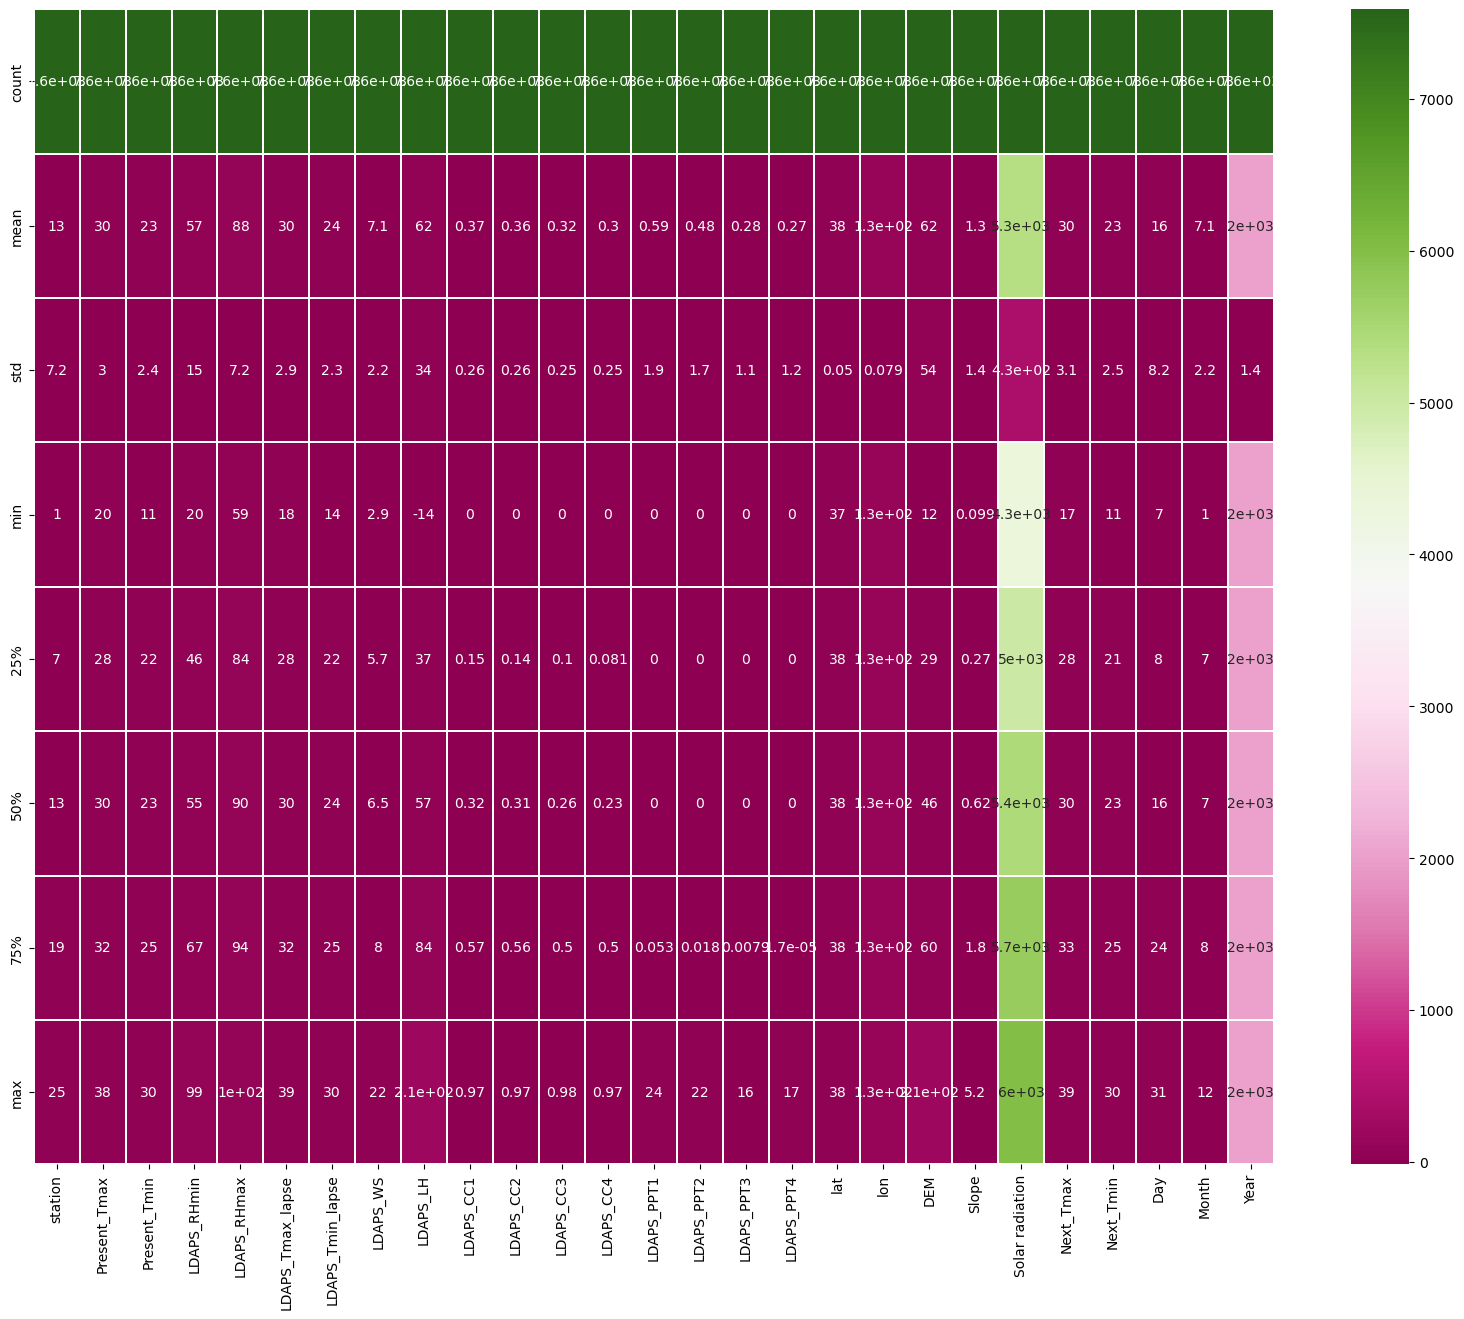

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.describe(),annot=True,cmap='PiYG',linewidth=0.1)
plt.show()

In [14]:
df.nunique().to_frame('No of unique values')

,No of unique values
station,25
Date,307
Present_Tmax,167
Present_Tmin,155
LDAPS_RHmin,7585
LDAPS_RHmax,7577
LDAPS_Tmax_lapse,7588
LDAPS_Tmin_lapse,7588
LDAPS_WS,7588
LDAPS_LH,7588


# Data Visualisation

# Bivariate Analysis

# Present Temperature(Min,Max)

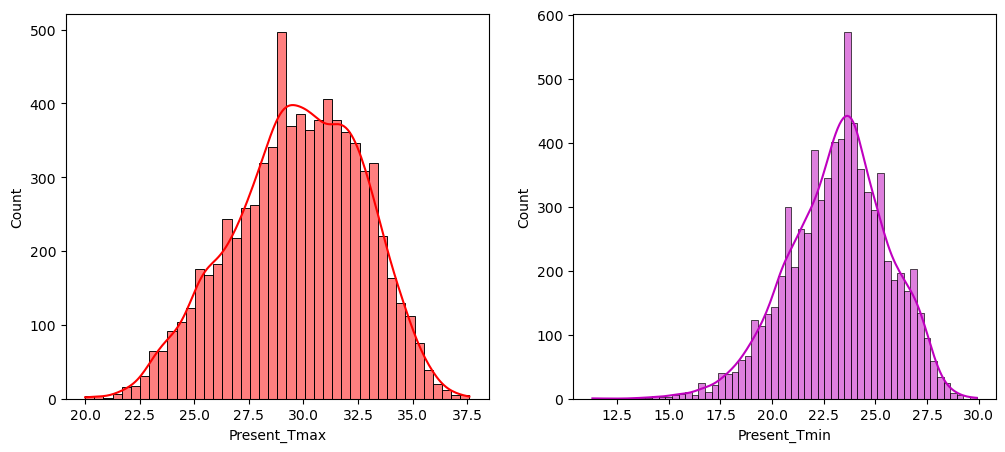

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

Observation:

1.For majority of reading Present Temperature Maximum varies in between 27.5 to 32.5 degree.

2.For majority of reading Present Temperature Minimum varies in between 21.5 to 27.5 degree.

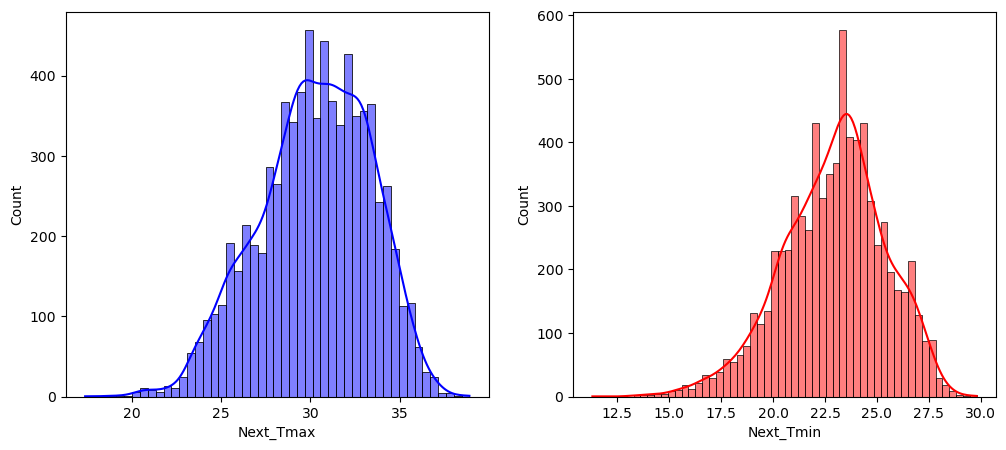

In [16]:
# Plotting histogram for target variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='r')
plt.show()

Obseravtion:

1.For majority of reading Next Temperature Maximum varies in between 25 to 35 degree.

2.For majority of reading Next Temperature Minimum varies in between 20 to 27.5 degree.

# Next Tmax Vs Cloud Cover

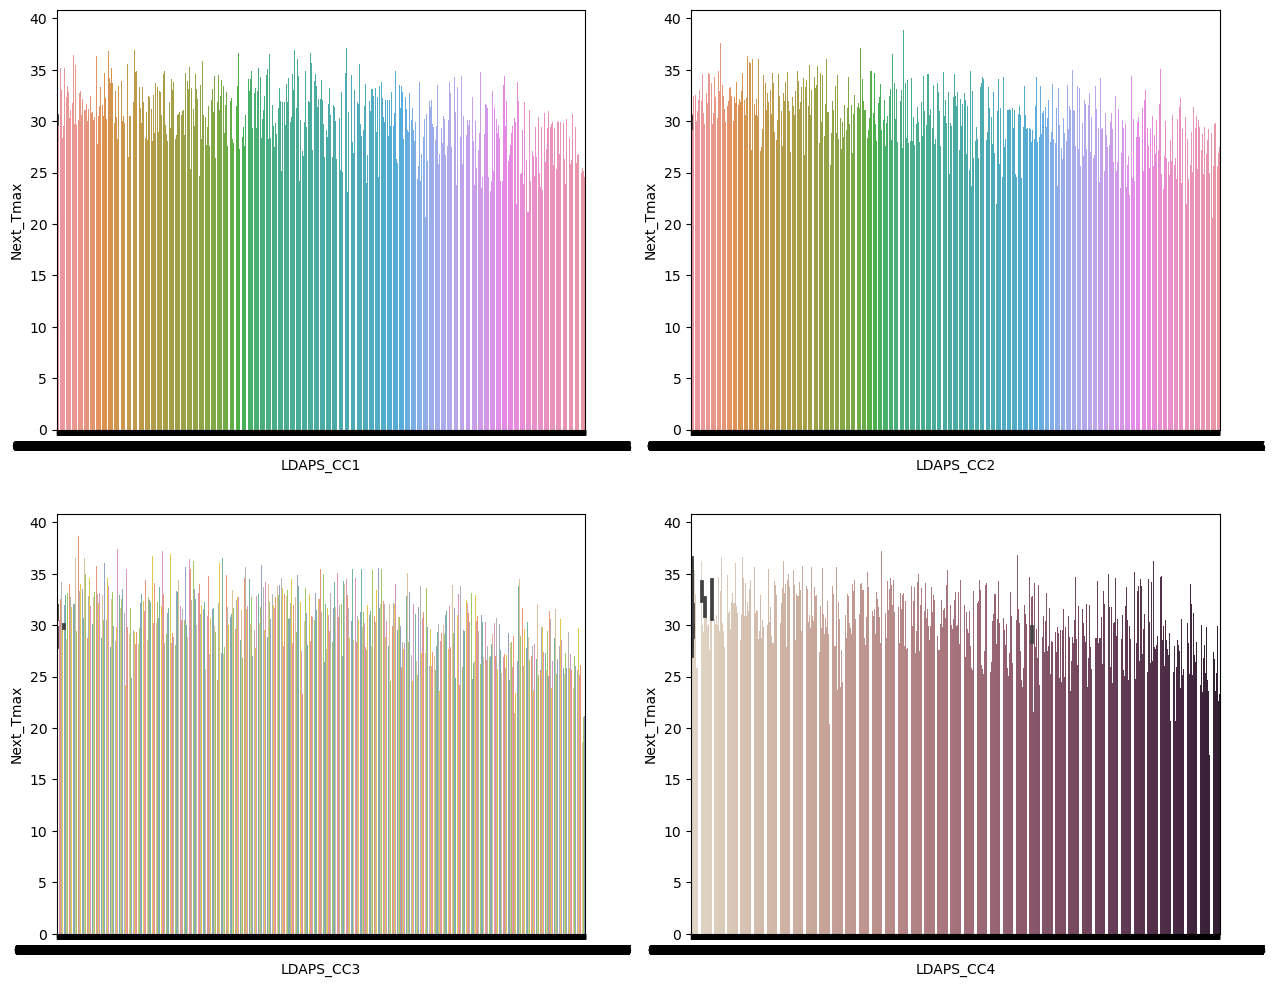

In [17]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

sns.barplot(x='LDAPS_CC1',y='Next_Tmax',ax=axes[0,0],data=df)


sns.barplot(x='LDAPS_CC2',y='Next_Tmax',ax=axes[0,1],data=df)


sns.barplot(x='LDAPS_CC3',y='Next_Tmax',ax=axes[1,0],data=df,palette="Set2")


sns.barplot(x='LDAPS_CC4',y='Next_Tmax',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

Observation:

Irrespective of 6 hr quarter in 24 hr day time, Next-day Temperature Maximum decreases as cloud cover increases.

# Next Tmin VS Cloud Cover

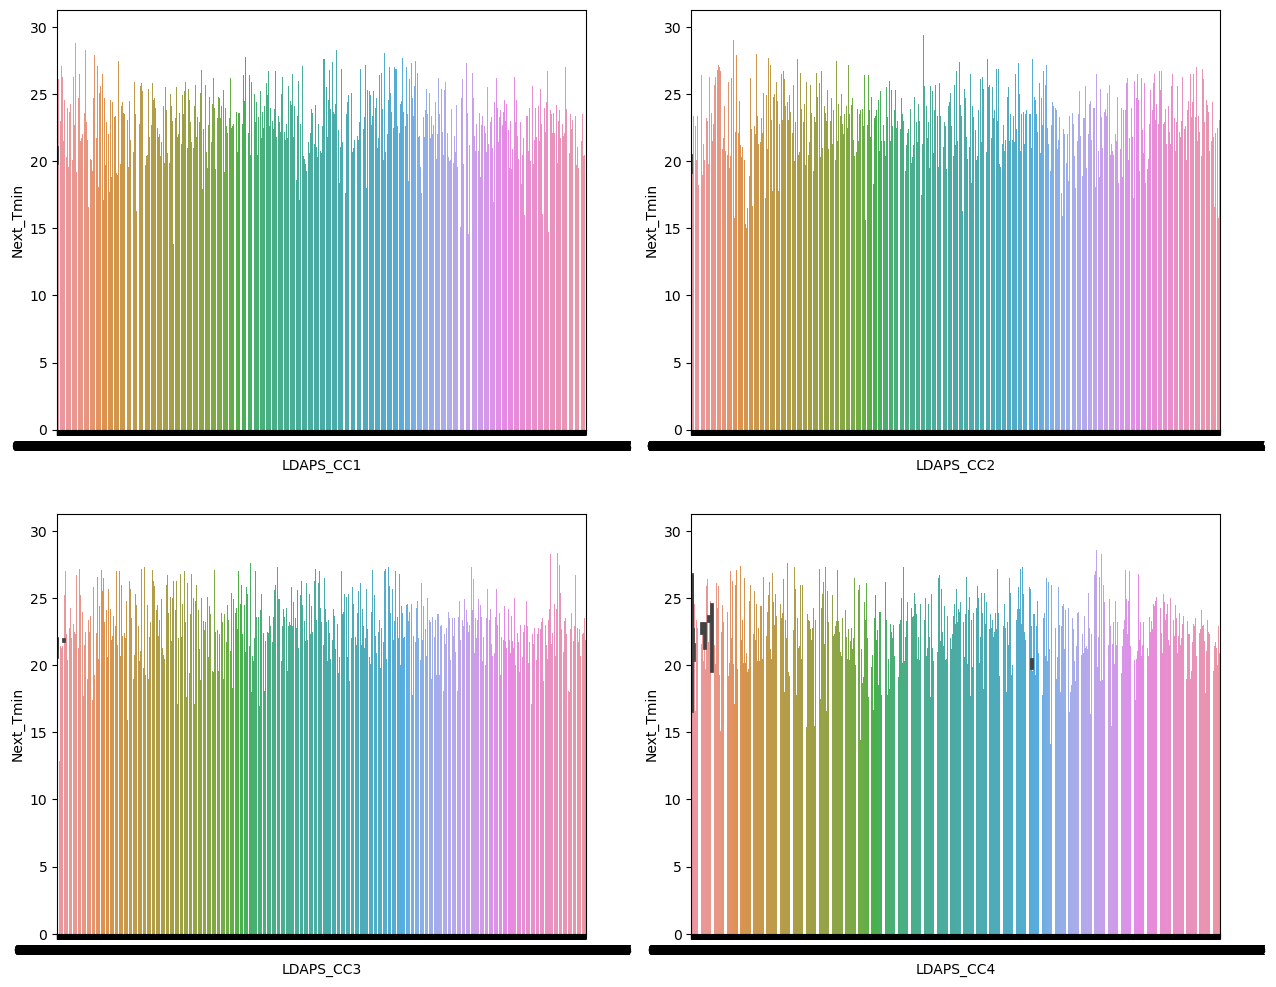

In [18]:
fig,axes=plt.subplots(2,2,figsize=(15,12))


sns.barplot(x='LDAPS_CC1',y='Next_Tmin',ax=axes[0,0],data=df)


sns.barplot(x='LDAPS_CC2',y='Next_Tmin',ax=axes[0,1],data=df)


sns.barplot(x='LDAPS_CC3',y='Next_Tmin',ax=axes[1,0],data=df)


sns.barplot(x='LDAPS_CC4',y='Next_Tmin',ax=axes[1,1],data=df)
plt.show()

Obsevation:

1.No significant relation between Next_Tmin and cloud cover in scatterplot.

2.We can say that Next_Tmin remains unaffected by cloud cover.



# Precipitaion VS NextTmax

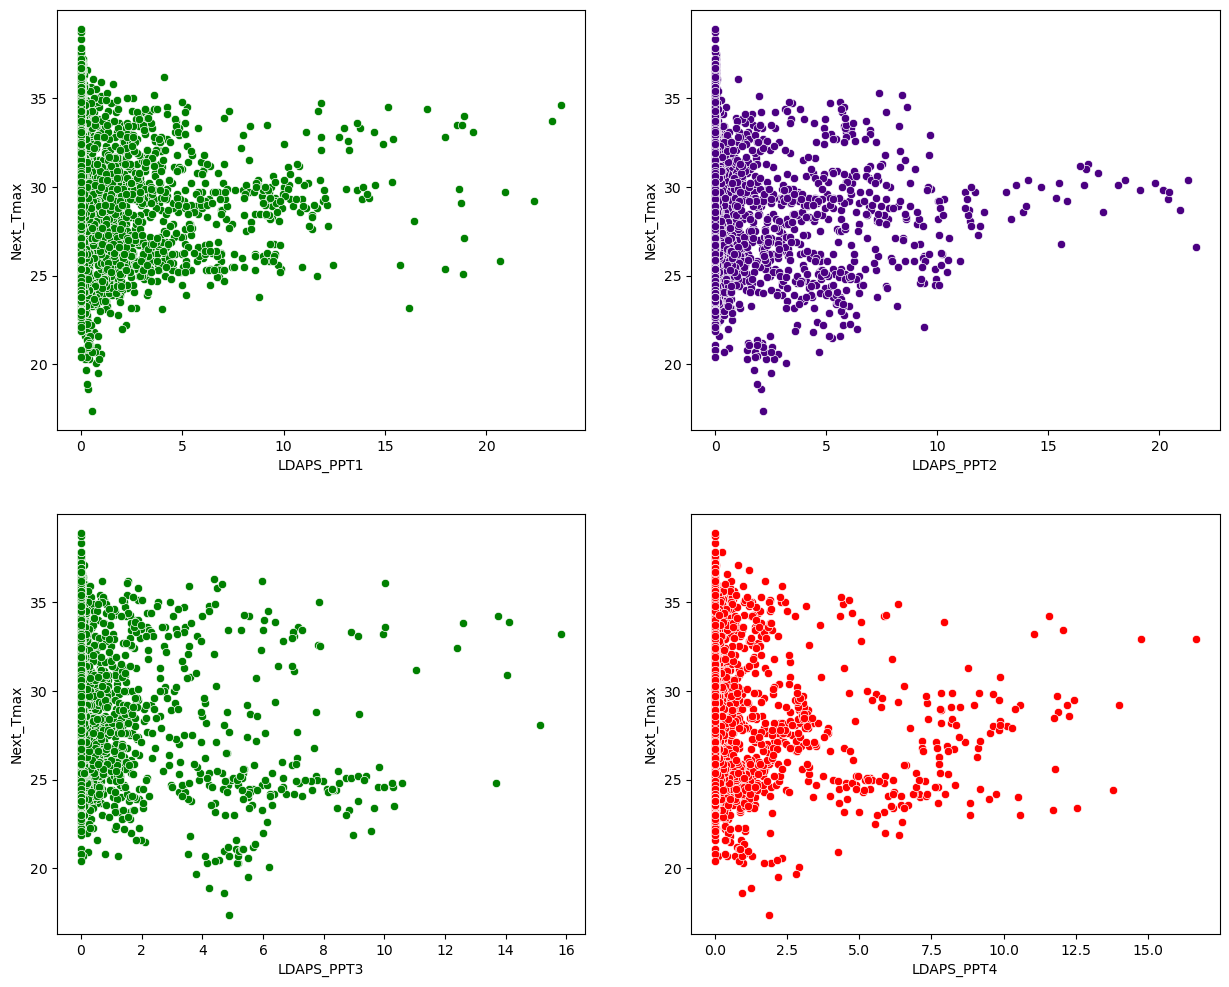

In [19]:
fig,axes=plt.subplots(2,2,figsize=(15,12))


sns.scatterplot(x='LDAPS_PPT1',y='Next_Tmax',ax=axes[0,0],data=df,color="g")


sns.scatterplot(x='LDAPS_PPT2',y='Next_Tmax',ax=axes[0,1],data=df,color="indigo")


sns.scatterplot(x='LDAPS_PPT3',y='Next_Tmax',ax=axes[1,0],data=df,color="g")


sns.scatterplot(x='LDAPS_PPT4',y='Next_Tmax',ax=axes[1,1],data=df,color="r")
plt.show()

# Precipitation VS NextTmin

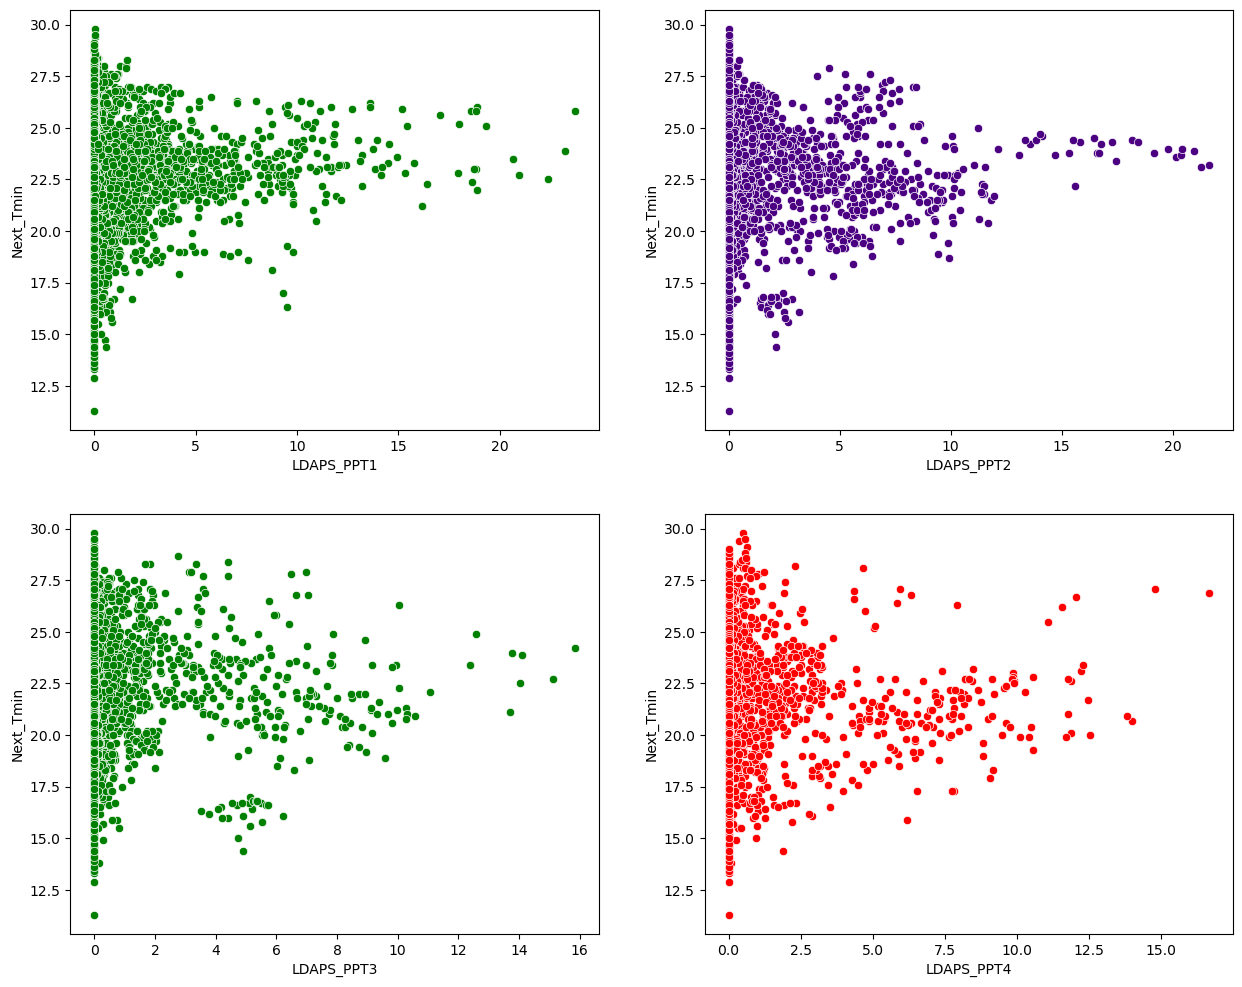

In [20]:
fig,axes=plt.subplots(2,2,figsize=(15,12))


sns.scatterplot(x='LDAPS_PPT1',y='Next_Tmin',ax=axes[0,0],data=df,color="g")


sns.scatterplot(x='LDAPS_PPT2',y='Next_Tmin',ax=axes[0,1],data=df,color="indigo")


sns.scatterplot(x='LDAPS_PPT3',y='Next_Tmin',ax=axes[1,0],data=df,color="g")


sns.scatterplot(x='LDAPS_PPT4',y='Next_Tmin',ax=axes[1,1],data=df,color="r")
plt.show()

# Next Tmax for Each Station

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


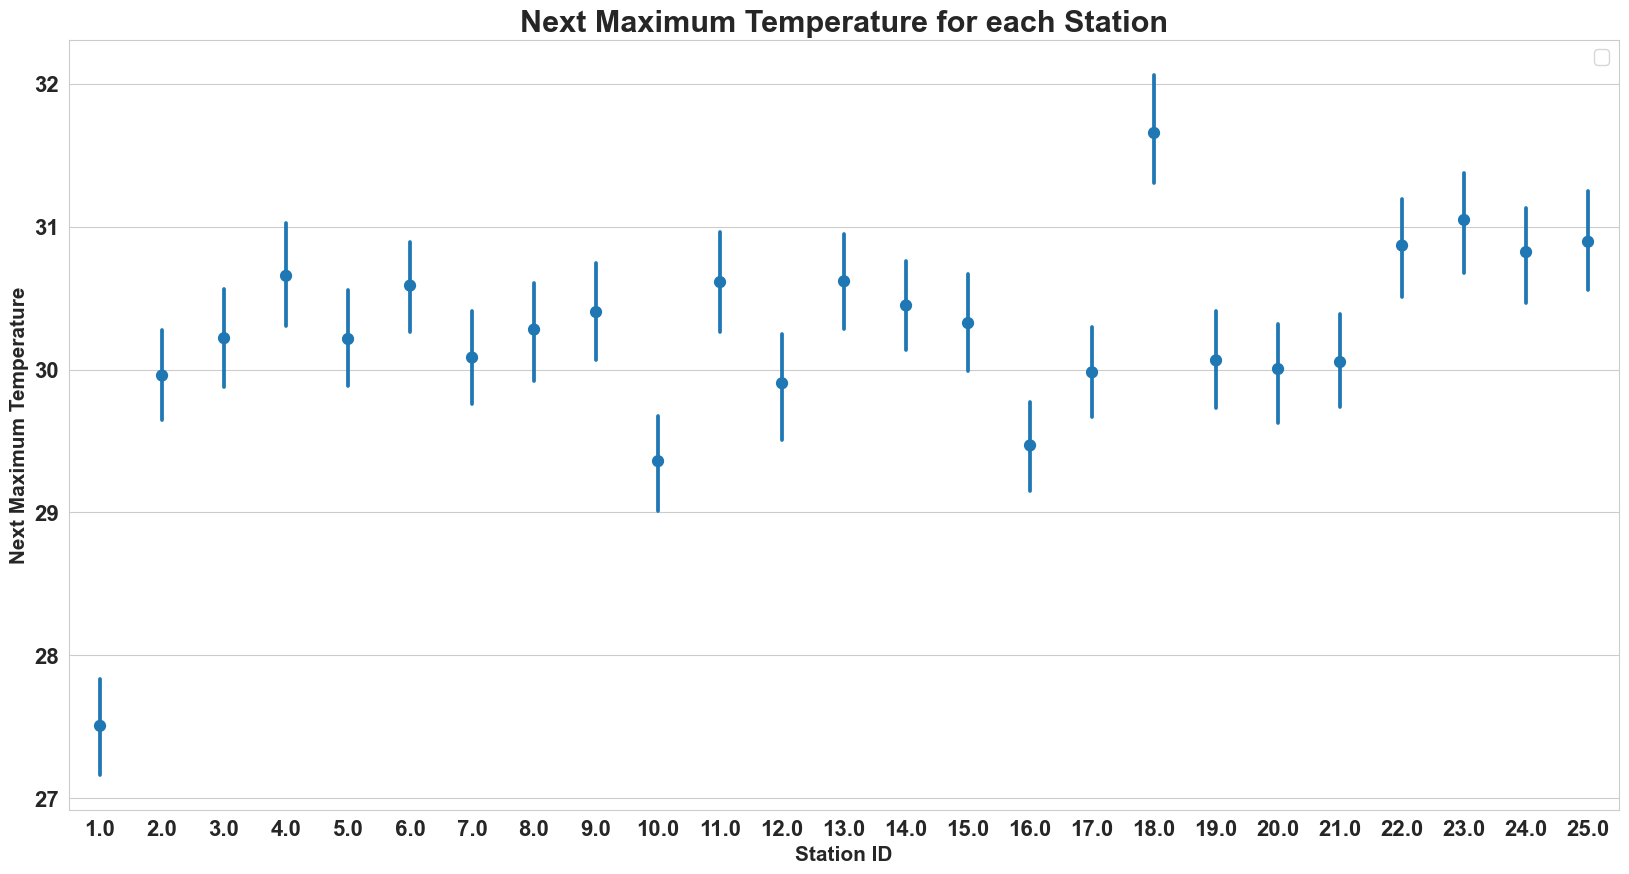

In [21]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Next_Tmax', data=df,join=False)
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Next Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

Observation:

we can notice the station 18 has highest temperature collection for  Next_Tmax .

Maximum temperature difference at same station occur in station 10.

# Next Tmin for each station

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


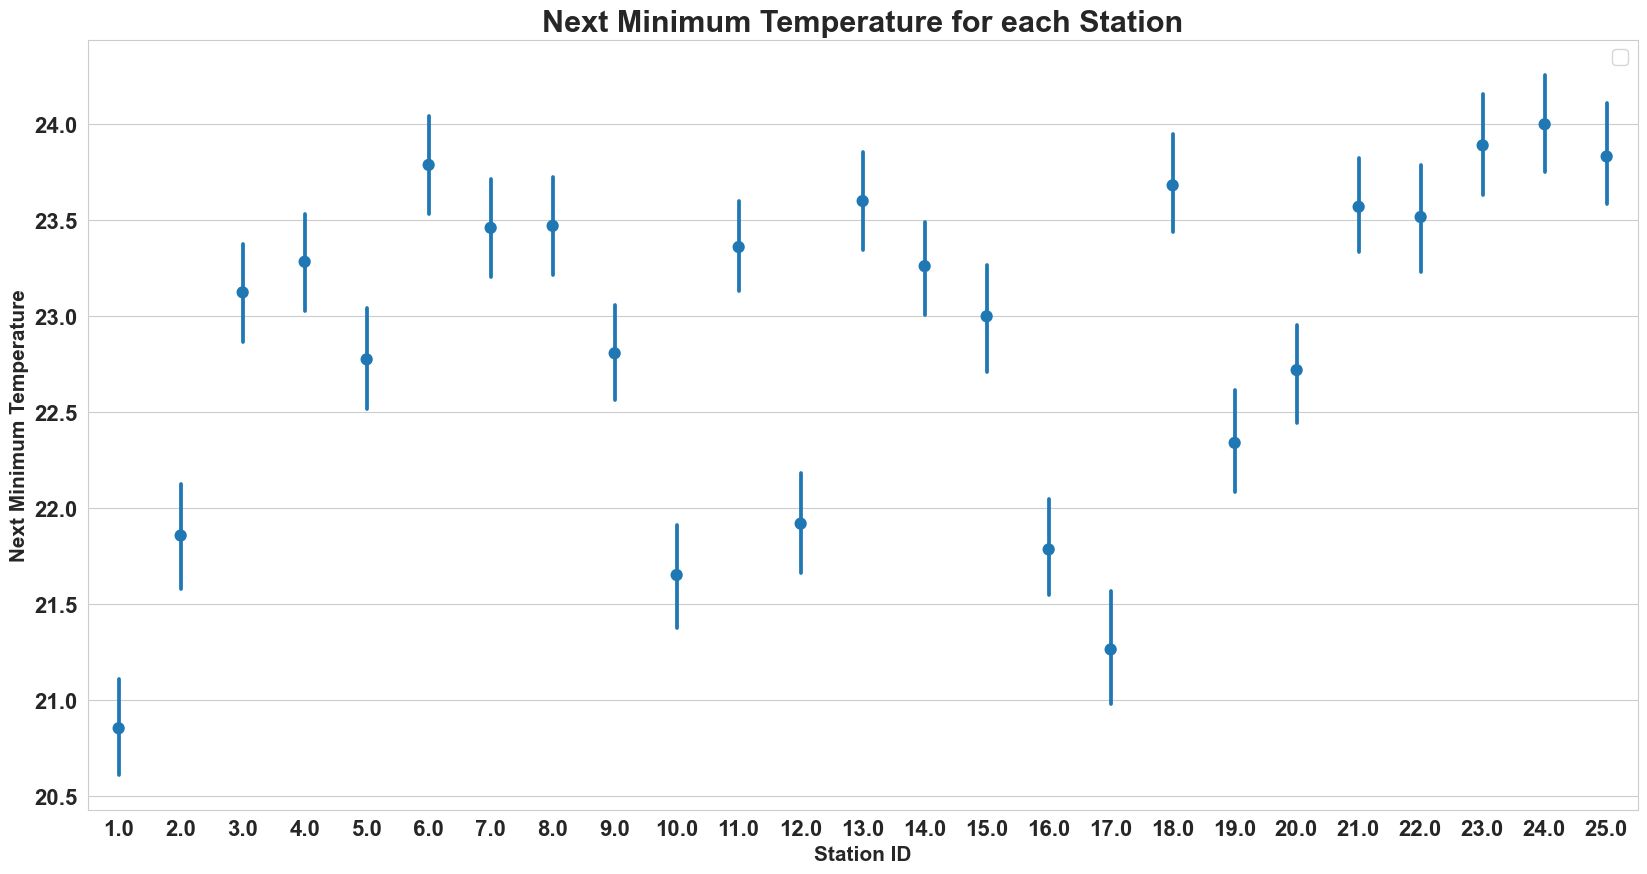

In [22]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Next_Tmin', data=df,join=False)
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Next Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

Observation:

we can notice the station 24 has highest temperature collection for  Next_Tmin targets.

Maximum temperature difference at same station occur in station 17.

# Next Tmax VS Solar Radiation

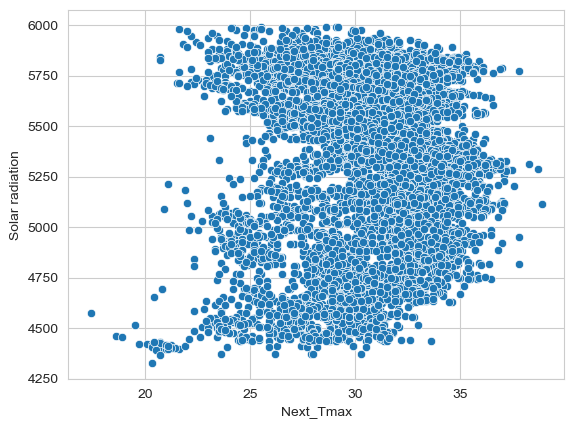

In [23]:
sns.scatterplot(x='Next_Tmax',y='Solar radiation',data=df)
plt.show()

Observation: The maximum temperature recorded will be 35 degrees

# Next Tmin VS Solar Radiation

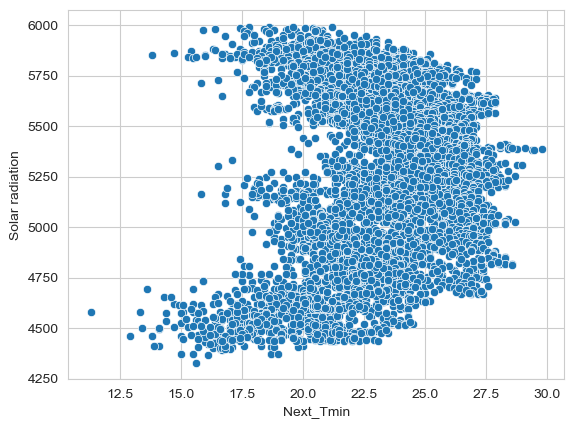

In [24]:
sns.scatterplot(x='Next_Tmin',y='Solar radiation',data=df)
plt.show()

Observation: The minimum temperature recorded will be 12.5

# Month VS NextTmax

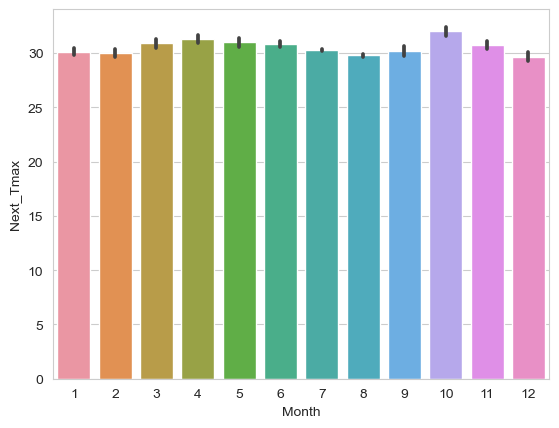

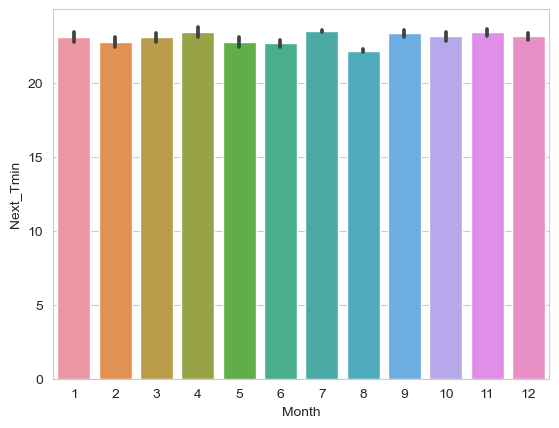

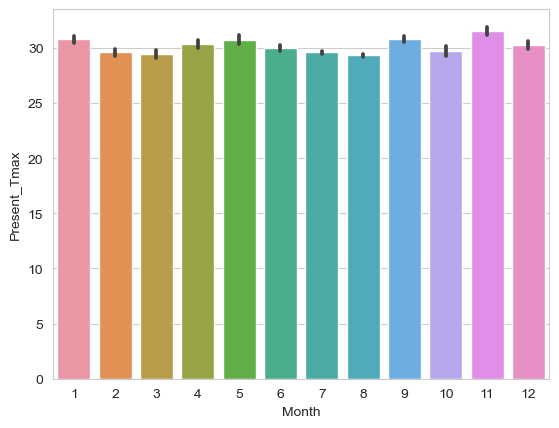

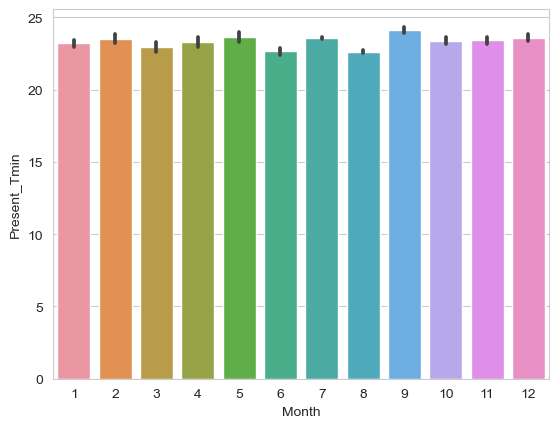

In [25]:
sns.barplot(x='Month',y='Next_Tmax',data=df)
plt.show()

sns.barplot(x='Month',y='Next_Tmin',data=df)
plt.show()

sns.barplot(x='Month',y='Present_Tmax',data=df)
plt.show()

sns.barplot(x='Month',y='Present_Tmin',data=df)

plt.show()

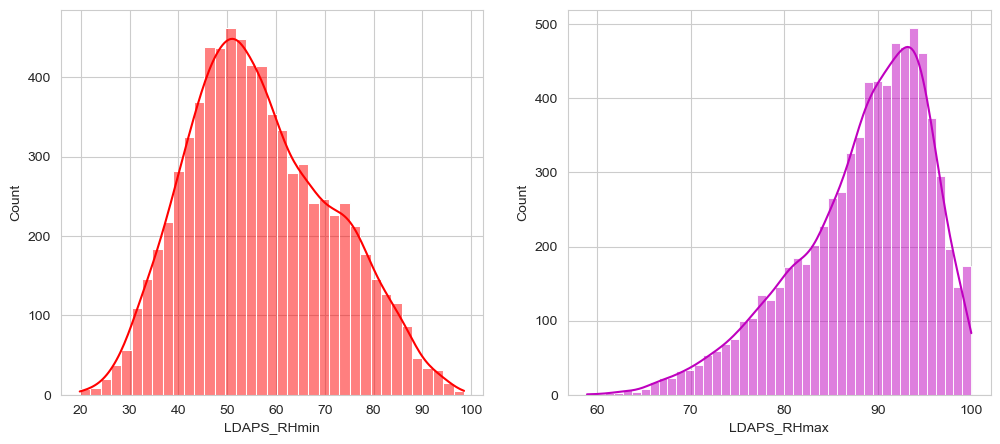

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='m')
plt.show()

Observation:

Data of Maximum Relative humidity is left skewed and Data of Minimum Relative humidity is slightly right skewed.

Maximum Relative humidity for most of the days lie in the range 90 to 97

Maximum Relative humidity lies in the range 45 to 62.

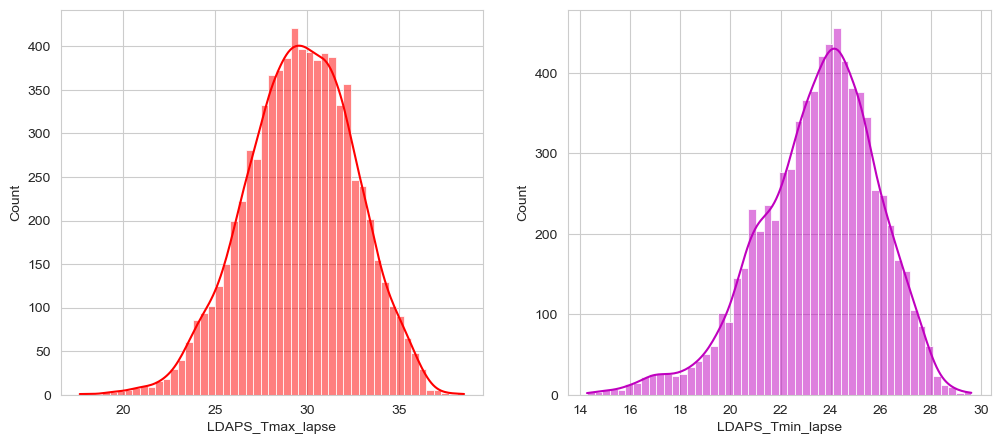

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='m')
plt.show()

Observation:

Tmax and Tmin for applied lapse rate are almost normally distributed.

Tmax_lapse for majority of days its values lies in the range 27 to 33 (Â°C).

Tmin_lapse for majority of days its values lies in the range 23 to 26 (Â°C).

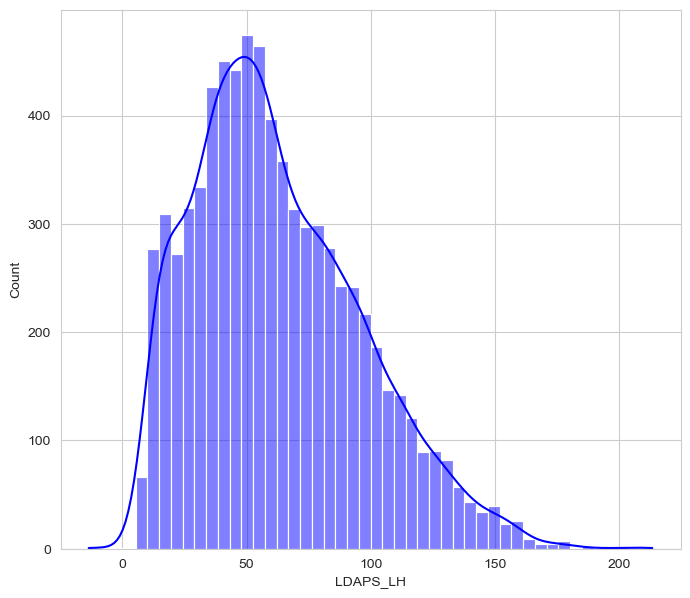

In [28]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')
plt.show()

Minimum Wind Speed : -4.0236147692941255 m/s
Maximum Wind Speed : 2.4380980654441946 m/s
Average Wind Speed : -2.404953287183084e-15 m/s


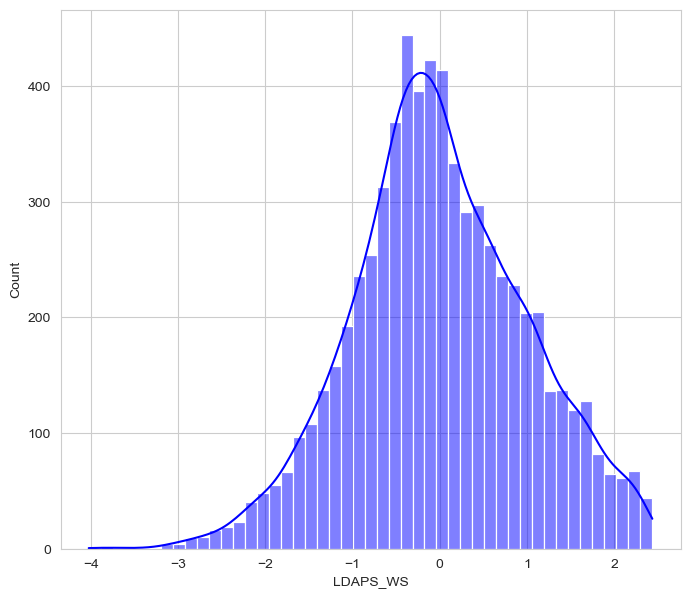

In [93]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_WS'],kde=True,color='blue')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

Observation:

It have its minimum value at -4m/s and maximum values at 2.85m/s


Graph is slightly right skewed.

# Solar Radiation And Month

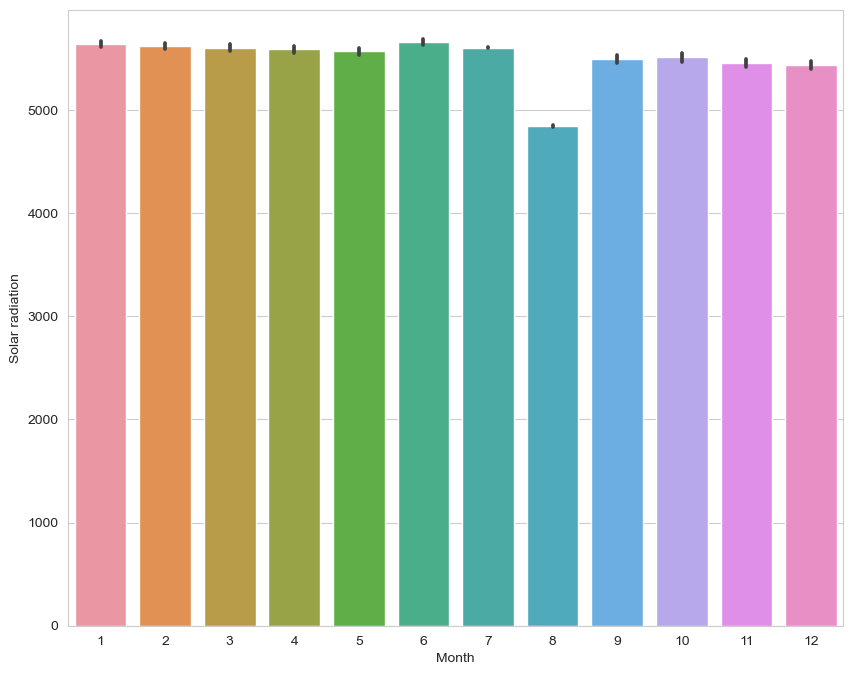

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(y='Solar radiation', x='Month',data=df)
plt.show()

Observation:

1.Solar Radiation data is left skewed.

2.It has its minimum value at 4300 Wh/m2 and maximum values at 5900 Wh/m2.

3.For most of reading solar radiation values lies in the range 5600 to 5850.

4.Minimum solar radiation occur in month of 8.

# Dropping unnecessary columns

In [31]:
df.drop(['Date'],axis=1,inplace=True)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


# Outliers Detection And Removal

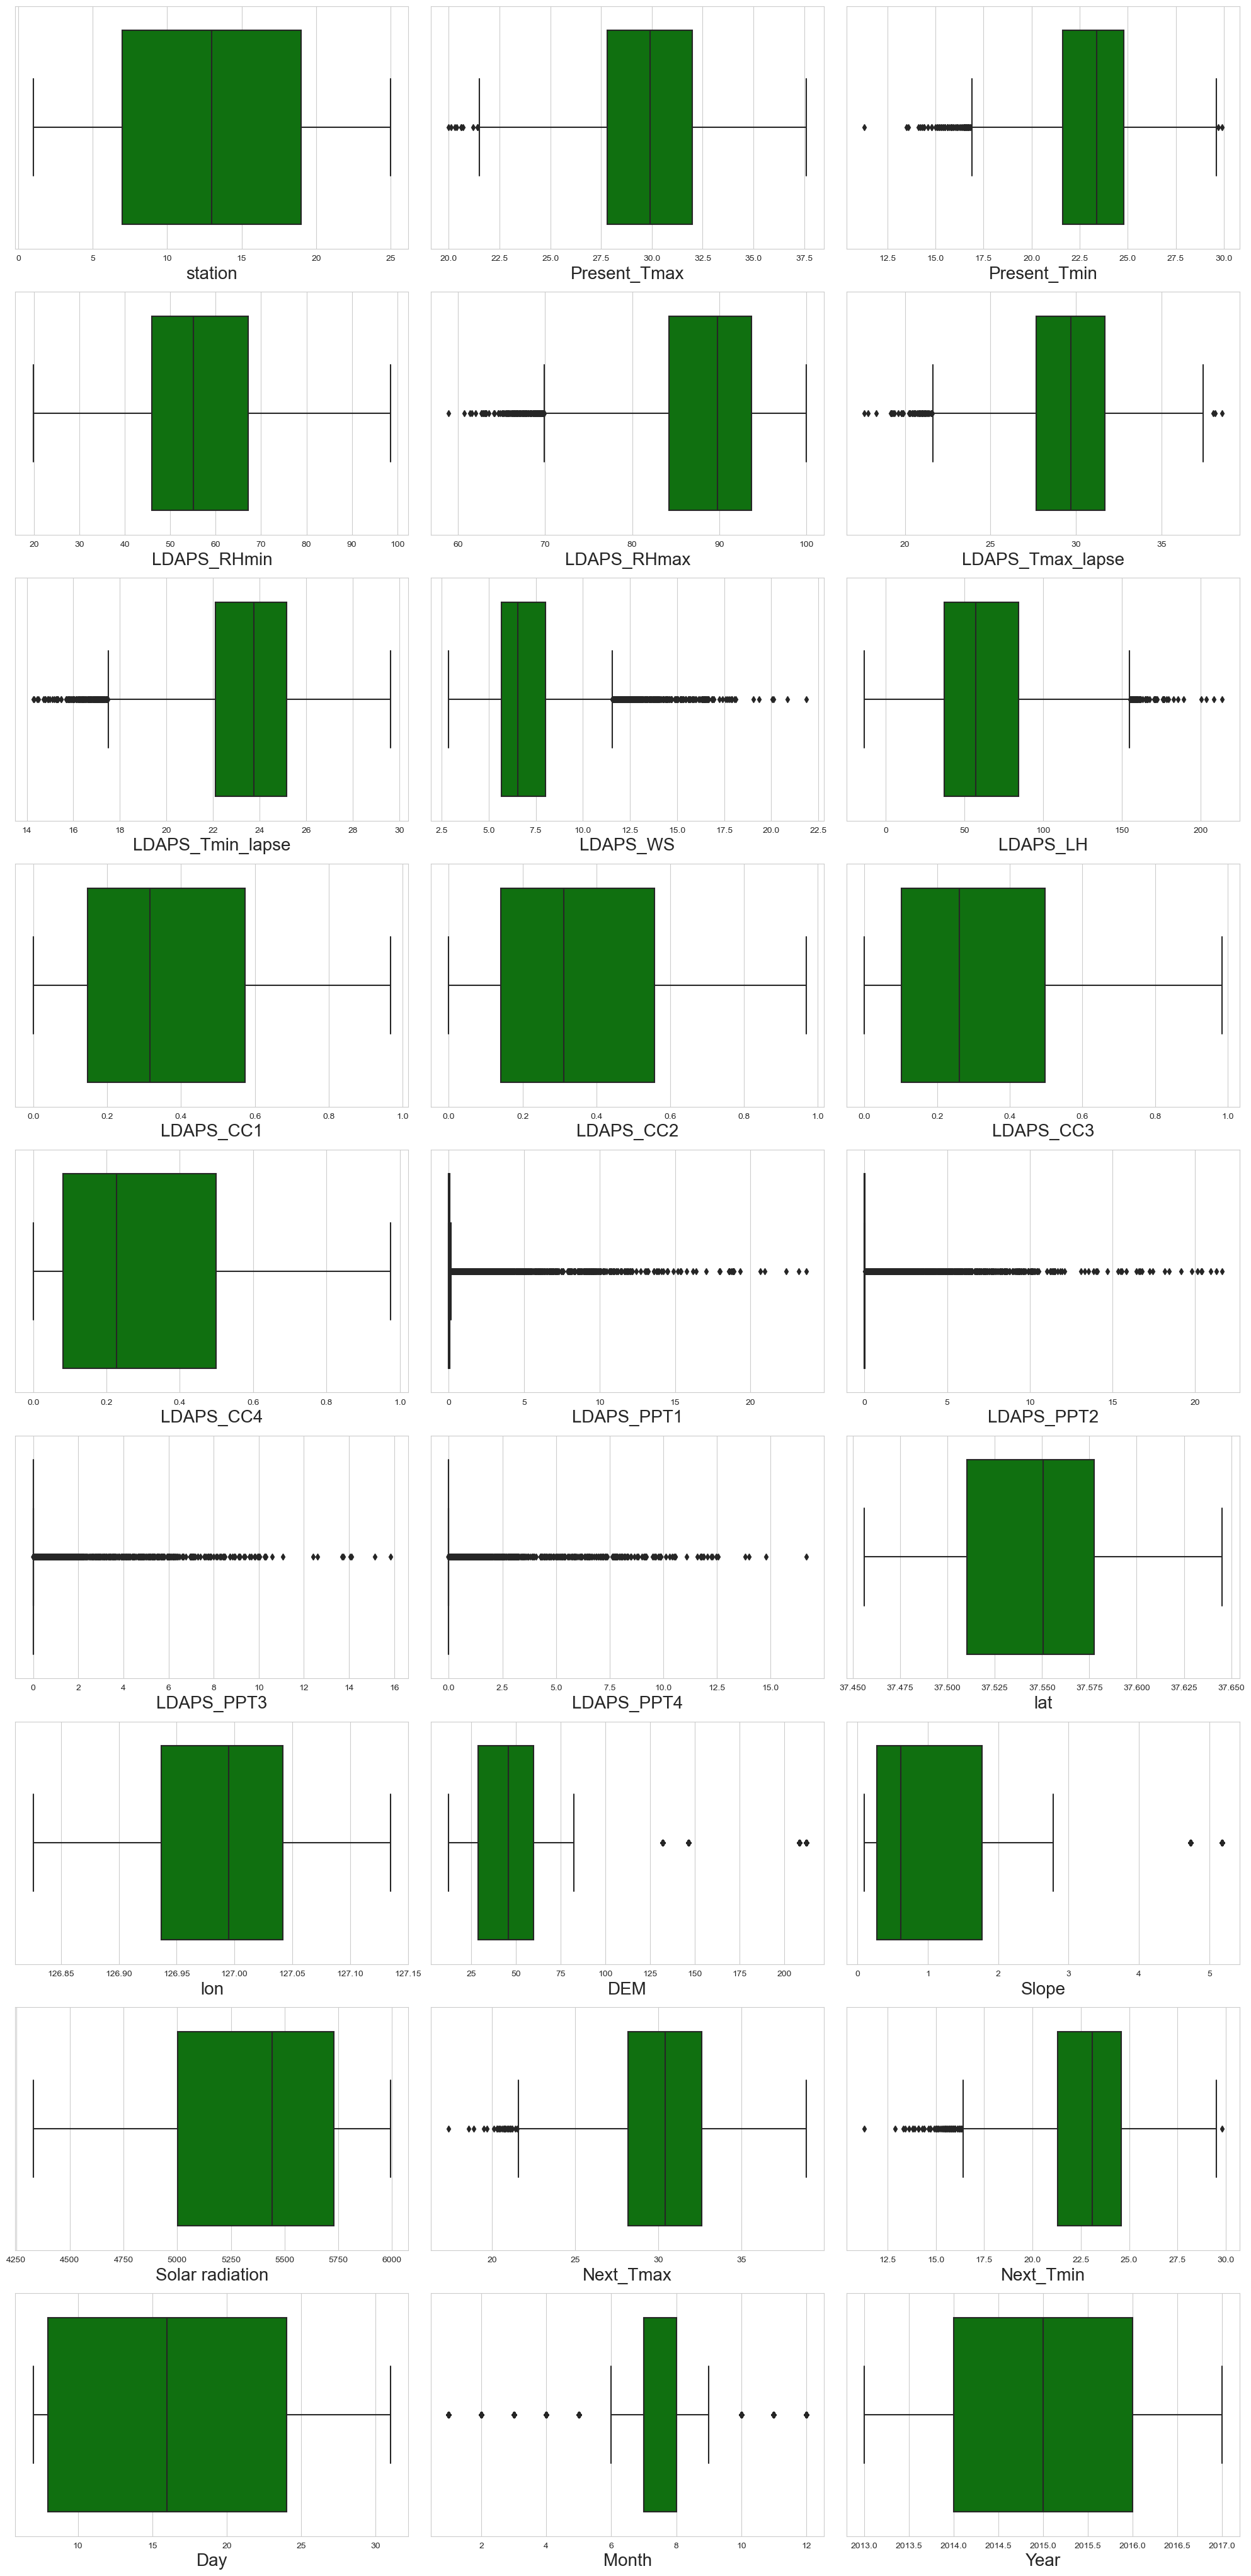

In [32]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


In [33]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [34]:
df=df1.copy()

# Skewness of variables

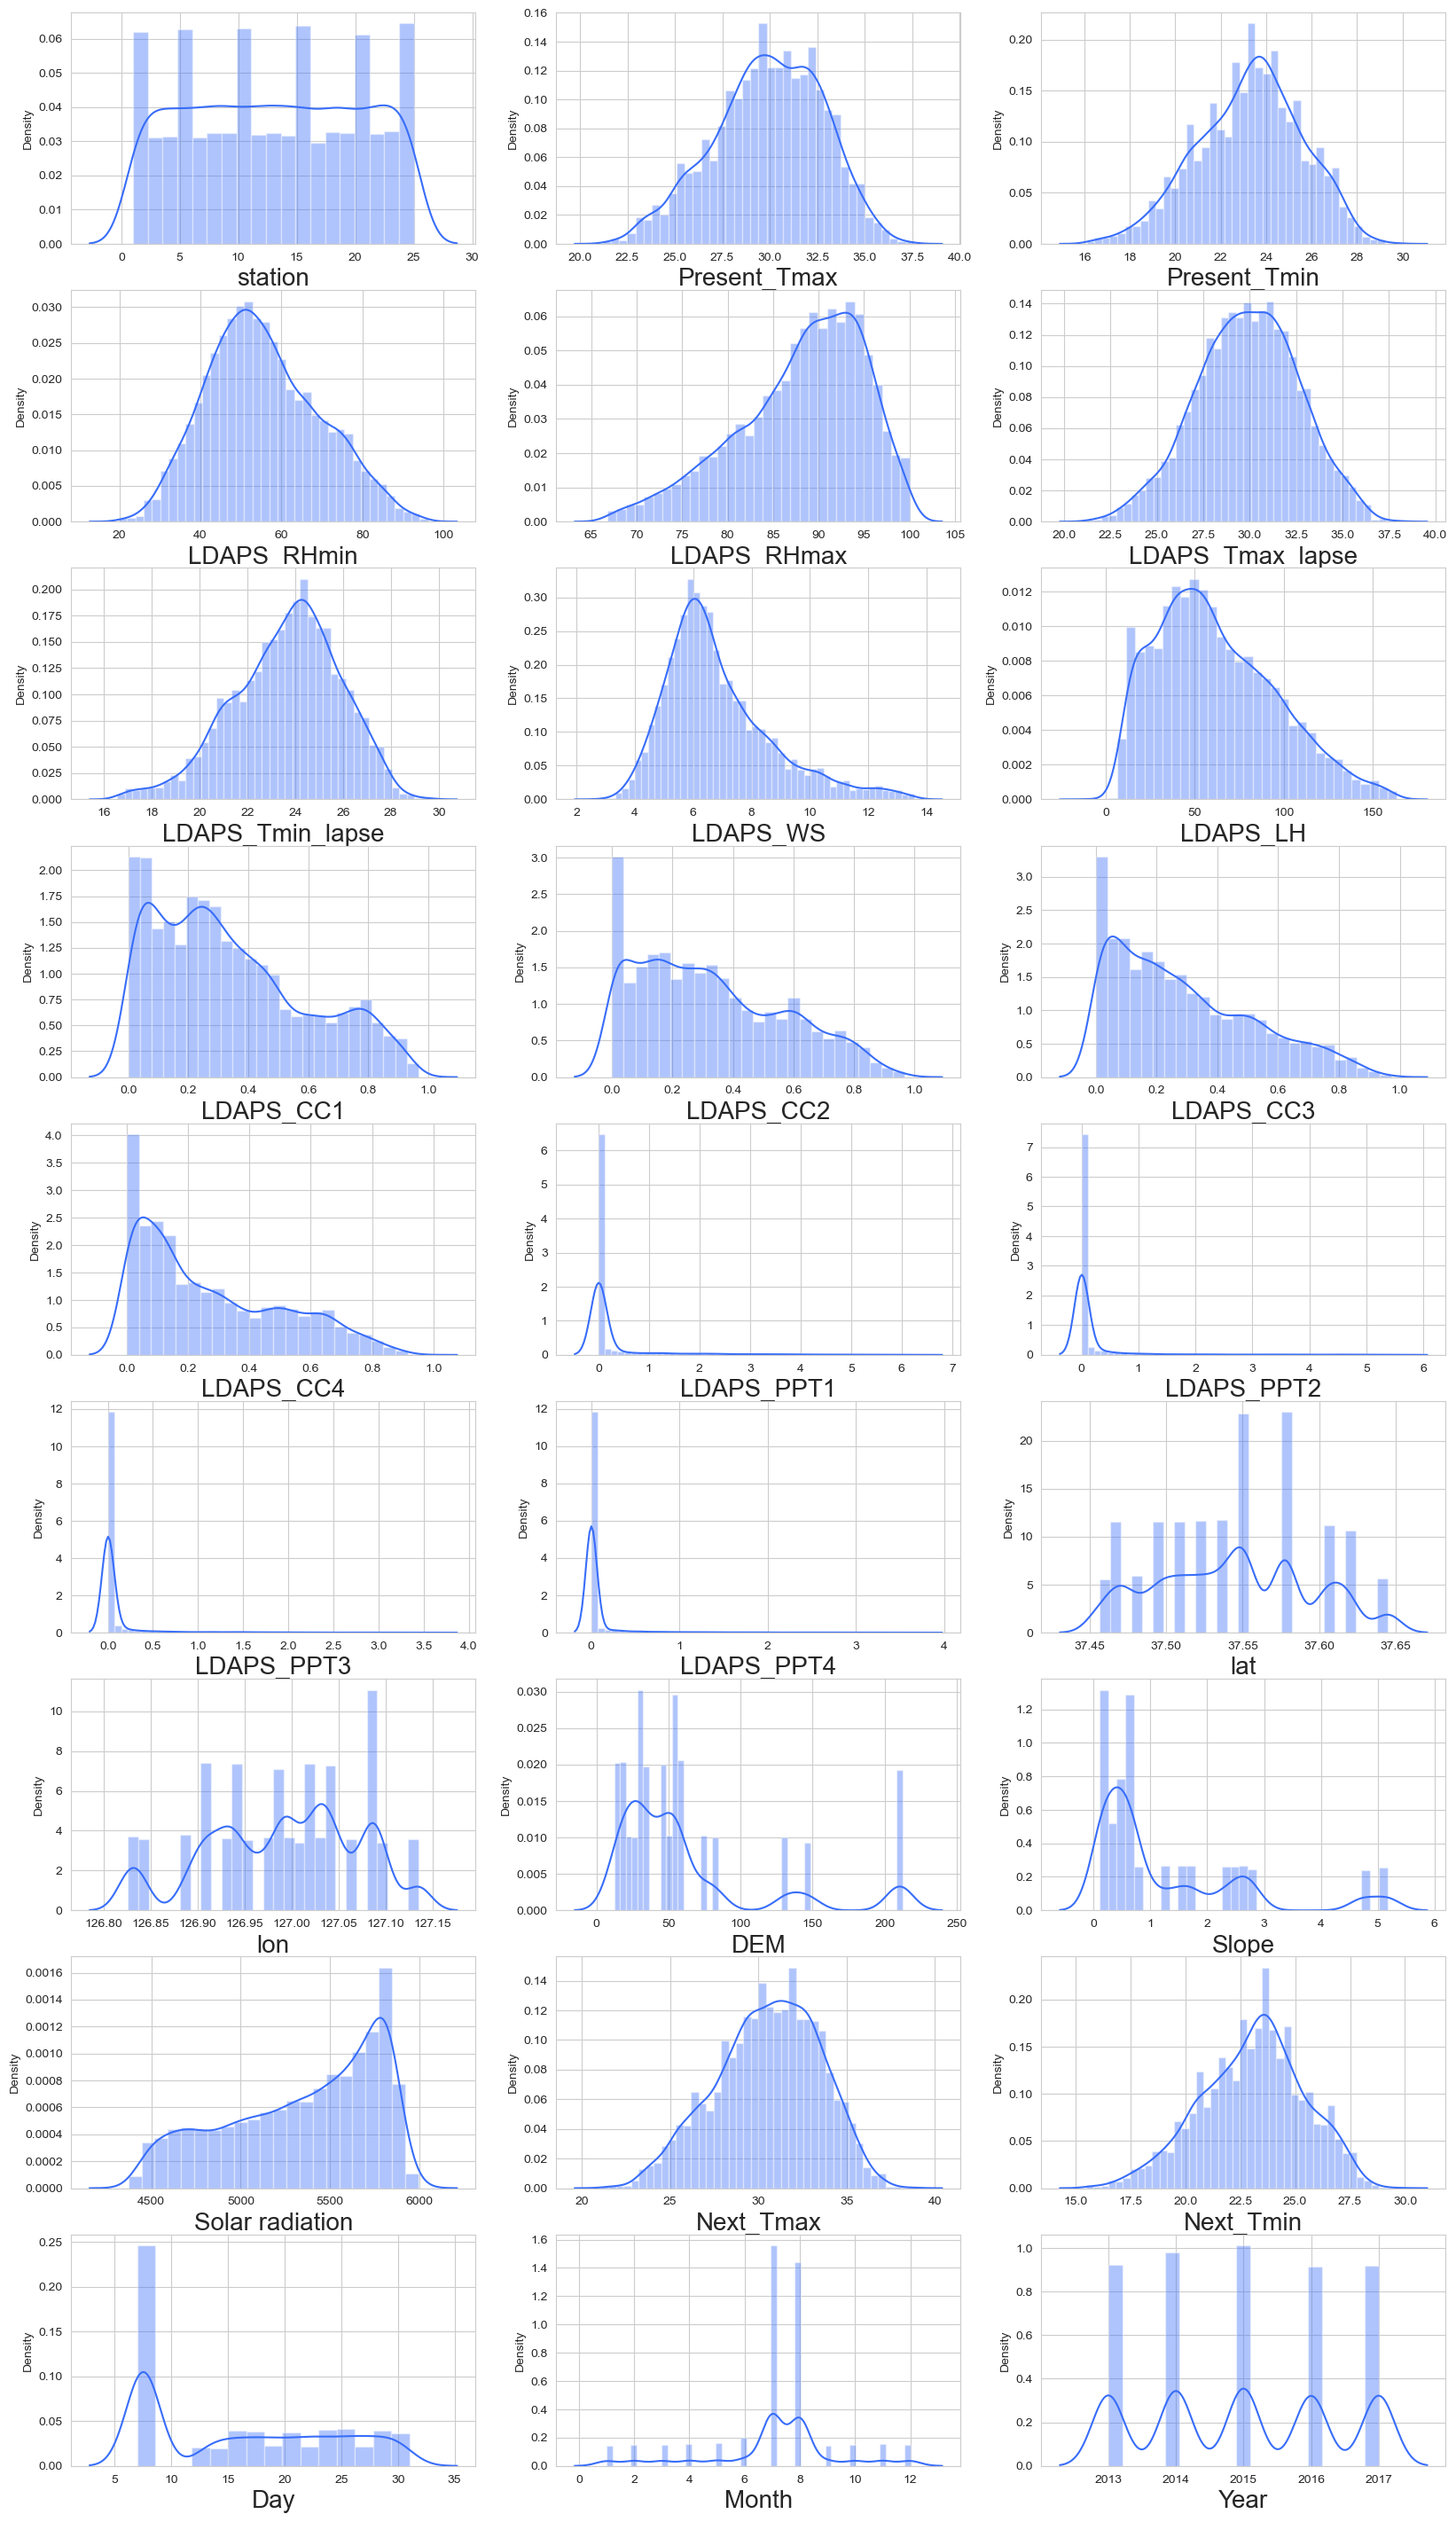

In [35]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Observation:

Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature
like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

We also going to ignore sknewness in target feature.

# Skewness

In [36]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
dtype: float64

Observation:

Here some are positively skewed while others are negatively skewed. We gone use yeo-johnson method for transfromation.

In [37]:
skew=['LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [38]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.065308
LDAPS_CC2           0.505774
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
dtype: float64

# Correlation

In [39]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.110291,0.133638,-0.069582,-0.176388,0.066863,0.104401,0.030231,-0.135717,0.011902,...,-0.241811,-0.122829,-0.326019,-0.146034,-0.032810,0.106378,0.129110,0.005179,0.003657,0.006658
Present_Tmax,0.110291,1.000000,0.610428,-0.154266,-0.297804,0.540680,0.616886,-0.071596,0.119022,-0.286862,...,-0.052041,0.011132,-0.130892,-0.092409,-0.059891,0.586943,0.615950,-0.136914,0.022300,0.099185
Present_Tmin,0.133638,0.610428,1.000000,0.151385,-0.039688,0.441577,0.764258,0.034364,-0.008556,0.104457,...,-0.072707,-0.043201,-0.238916,-0.157839,0.020030,0.438813,0.785946,-0.076877,-0.021664,0.099222
LDAPS_RHmin,-0.069582,-0.154266,0.151385,1.000000,0.552581,-0.555583,0.129481,0.171684,-0.002412,0.580343,...,0.090054,-0.093969,0.057460,0.083910,0.251733,-0.433872,0.134518,-0.070194,-0.074915,0.001709
LDAPS_RHmax,-0.176388,-0.297804,-0.039688,0.552581,1.000000,-0.385695,-0.142575,0.044684,0.297032,0.403332,...,0.200216,0.018945,0.161935,0.188685,0.153673,-0.301797,-0.097490,-0.011008,-0.049988,-0.140290
LDAPS_Tmax_lapse,0.066863,0.540680,0.441577,-0.555583,-0.385695,1.000000,0.621299,-0.154400,0.005878,-0.404350,...,-0.038285,0.106354,-0.110286,-0.105094,0.012974,0.816861,0.553227,-0.140514,-0.010979,0.066794
LDAPS_Tmin_lapse,0.104401,0.616886,0.764258,0.129481,-0.142575,0.621299,1.000000,-0.011333,-0.141554,0.074850,...,-0.090587,-0.024177,-0.169881,-0.156322,0.106033,0.546479,0.875382,-0.143758,-0.021155,0.050935
LDAPS_WS,0.030231,-0.071596,0.034364,0.171684,0.044684,-0.154400,-0.011333,1.000000,-0.056362,0.189345,...,-0.027463,-0.077686,0.113157,0.095385,0.148098,-0.205979,0.023330,-0.050895,-0.077362,-0.119526
LDAPS_LH,-0.135717,0.119022,-0.008556,-0.002412,0.297032,0.005878,-0.141554,-0.056362,1.000000,-0.130020,...,0.100486,0.009790,0.053275,0.069892,-0.030184,0.151784,-0.052365,-0.014488,-0.021517,0.054981
LDAPS_CC1,0.011902,-0.286862,0.104457,0.580343,0.403332,-0.404350,0.074850,0.189345,-0.130020,1.000000,...,-0.014977,-0.016127,-0.031579,-0.034505,0.237733,-0.430392,0.043682,-0.037549,-0.118552,-0.066940


<AxesSubplot:>

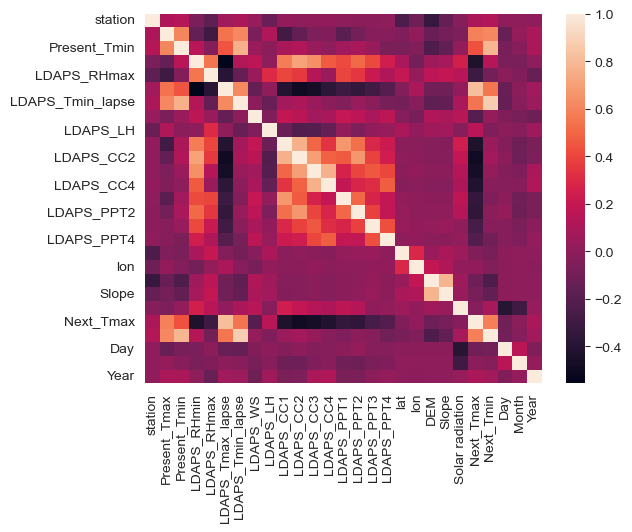

In [40]:
sns.heatmap(df.corr())

# Scaling of data

# For Next Tmax

In [41]:
x = df.drop(['Next_Tmax'], axis =1)
y = df['Next_Tmax']

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.67271855, -0.42570408, -0.81445954, ...,  1.67404544,
        -0.47951937, -1.42147346],
       [-1.5339585 ,  0.69021541, -0.72778535, ...,  1.67404544,
        -0.47951937, -1.42147346],
       [-1.39519845,  0.58559796,  0.00894523, ...,  1.67404544,
        -0.47951937, -1.42147346],
       ...,
       [ 1.38000259, -2.30881822, -2.67795455, ...,  1.67404544,
         0.41020559,  1.44293849],
       [ 1.51876264, -2.30881822, -2.41793199, ...,  1.67404544,
         0.41020559,  1.44293849],
       [ 1.65752269, -2.3436907 , -2.54794327, ...,  1.67404544,
         0.41020559,  1.44293849]])

# VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif

,vif,features
0,1.290961,station
1,2.870534,Present_Tmax
2,3.359372,Present_Tmin
3,6.071796,LDAPS_RHmin
4,2.359001,LDAPS_RHmax
5,6.973476,LDAPS_Tmax_lapse
6,8.706128,LDAPS_Tmin_lapse
7,1.220825,LDAPS_WS
8,1.526653,LDAPS_LH
9,4.209208,LDAPS_CC1


# Modelling of Data

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (4515, 26)
Training target vector size: (4515,)
Test feature matrix size: (2224, 26)
Test target vector size: (2224,)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8016255973354549 on Random_state 108


# Linear Regression

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg.score(x_train,y_train)
y_pred=lin_reg.predict(x_test)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score :',r2_score(y_test,y_pred))

Mean absolute error : 1.066427728459236
Mean squared error : 1.938408931180862
Root Mean Squared Error: 1.3922675501428818
R2 score : 0.7734510925696818


# Other Models For ML

In [52]:
rfr = RandomForestRegressor()
dtc = DecisionTreeRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
rd=Ridge()
la=Lasso()
svr=SVR()
etr=ExtraTreesRegressor()
model = [rfr,rd,dtc,abr,gbr,la,svr,etr]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    y_pred = m.predict(x_test)
    print('\n')                                        
    print(' Error of ', m)
    print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
    print('Mean squared error :', mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

    
    print('R2 score:',r2_score(y_test,y_pred)) 




 Error of  RandomForestRegressor()
Mean absolute error : 0.7121344424460426
Mean squared error : 0.889859575089927
Root Mean Squared Error: 0.9433236852162289


R2 score: 0.8959988724462701


 Error of  Ridge()
Mean absolute error : 1.066451889554894
Mean squared error : 1.9384011272185704
Root Mean Squared Error: 1.3922647475313632


R2 score: 0.7734520046471607


 Error of  DecisionTreeRegressor()
Mean absolute error : 1.0348471223021583
Mean squared error : 2.064231115107914
Root Mean Squared Error: 1.4367432321427214


R2 score: 0.7587457959521073


 Error of  AdaBoostRegressor()
Mean absolute error : 1.1496928453135193
Mean squared error : 2.017188748958241
Root Mean Squared Error: 1.4202777013521832


R2 score: 0.7642438085142208


 Error of  GradientBoostingRegressor()
Mean absolute error : 0.8779799387433618
Mean squared error : 1.3069503101092976
Root Mean Squared Error: 1.1432192747278616


R2 score: 0.8472519600698484


 Error of  Lasso()
Mean absolute error : 1.2932908675

# Cross Val Score

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
# Cross Validation
rfr = RandomForestRegressor()
dtc = DecisionTreeRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
rd=Ridge()
la=Lasso()
svr=SVR()
etr=ExtraTreesRegressor()
model = [rfr,rd,dtc,abr,gbr,la,svr,etr]
for m in model:
    score = cross_val_score(m, x, y, cv =5)
    print('\n')
    print('Cross Validation Score :',m)
    print("Mean CV Score :",score.mean())



Cross Validation Score : RandomForestRegressor()
Mean CV Score : 0.6896136903806158


Cross Validation Score : Ridge()
Mean CV Score : 0.6858787775043591


Cross Validation Score : DecisionTreeRegressor()
Mean CV Score : 0.4029548361592631


Cross Validation Score : AdaBoostRegressor()
Mean CV Score : 0.6520586981061299


Cross Validation Score : GradientBoostingRegressor()
Mean CV Score : 0.7066163072203799


Cross Validation Score : Lasso()
Mean CV Score : 0.6333047459012562


Cross Validation Score : SVR()
Mean CV Score : -0.12452325831556961


Cross Validation Score : ExtraTreesRegressor()
Mean CV Score : 0.6908099202817051


# We came to know that Extra Trees Regressor has highest R2 score among all

# Grid Search CV

In [56]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameter={'n_estimators':[100], 'criterion':['squared_error'], 'max_depth':[None],
           'min_samples_split':[2], 'min_samples_leaf':[1], 'min_weight_fraction_leaf':[0.0],
           'max_features':[1.0], 'max_leaf_nodes':[None], 'min_impurity_decrease':[0.0],
           'bootstrap':[False], 'oob_score':[False]}

In [87]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['squared_error'],
                         'max_depth': [None], 'max_features': [1.0],
                         'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'oob_score': [False]},
             verbose=3)

In [88]:
GCV.best_params_

{'bootstrap': False,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'oob_score': False}

In [90]:
Model=ExtraTreesRegressor(bootstrap= False,
 criterion= 'squared_error',
 max_depth= None,
 max_features=1.0,
 max_leaf_nodes= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 100,
 oob_score=False)
Model.fit(x_train,y_train)

print('R2 Score :', r2_score(y_test, y_pred))

R2 Score : 0.922373220676793


In [91]:
import pickle
import joblib

In [94]:
filename='forecast for Next Tmax.pkl'
pickle.dump(Model,open(filename,'wb'))

# Machine learning Models for Next Tmin

In [96]:
x = df.drop(['Next_Tmin'], axis =1)
y = df['Next_Tmin']

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.67271855, -0.42570408, -0.81445954, ...,  1.67404544,
        -0.47951937, -1.42147346],
       [-1.5339585 ,  0.69021541, -0.72778535, ...,  1.67404544,
        -0.47951937, -1.42147346],
       [-1.39519845,  0.58559796,  0.00894523, ...,  1.67404544,
        -0.47951937, -1.42147346],
       ...,
       [ 1.38000259, -2.30881822, -2.67795455, ...,  1.67404544,
         0.41020559,  1.44293849],
       [ 1.51876264, -2.30881822, -2.41793199, ...,  1.67404544,
         0.41020559,  1.44293849],
       [ 1.65752269, -2.3436907 , -2.54794327, ...,  1.67404544,
         0.41020559,  1.44293849]])

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (4515, 26)
Training target vector size: (4515,)
Test feature matrix size: (2224, 26)
Test target vector size: (2224,)


# Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg.score(x_train,y_train)
y_pred=lin_reg.predict(x_test)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score is :',r2_score(y_test,y_pred))

Mean absolute error : 0.7629371018466468
Mean squared error : 0.9202006098538784
Root Mean Squared Error: 0.9592708740777437
R2 score is : 0.8296992132860432


# Other Models For ML

In [100]:
rfr = RandomForestRegressor()
dtc = DecisionTreeRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
rd=Ridge()
la=Lasso()
svr=SVR()
model = [rfr,rd,dtc,abr,gbr,la,svr]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    y_pred = m.predict(x_test)
    print('\n')                                        
    print(' Error of ', m)
    print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
    print('Mean squared error :', mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

    
    print('R2 score:',r2_score(y_test,y_pred)) 



 Error of  RandomForestRegressor()
Mean absolute error : 0.5775697329376857
Mean squared error : 0.5672451513353121
Root Mean Squared Error: 0.7531567906719769


R2 score: 0.8950203960988236


 Error of  Ridge()
Mean absolute error : 0.7628866226723143
Mean squared error : 0.9203526501585169
Root Mean Squared Error: 0.9593501186524744


R2 score: 0.8296710753091554


 Error of  DecisionTreeRegressor()
Mean absolute error : 0.8430267062314539
Mean squared error : 1.2656577645895153
Root Mean Squared Error: 1.12501456194554


R2 score: 0.7657657355232039


 Error of  AdaBoostRegressor()
Mean absolute error : 0.8363357480939325
Mean squared error : 1.0617043472829195
Root Mean Squared Error: 1.0303903858649495


R2 score: 0.8035112304167887


 Error of  GradientBoostingRegressor()
Mean absolute error : 0.6200912493221789
Mean squared error : 0.6131778602893402
Root Mean Squared Error: 0.7830567414238512


R2 score: 0.886519666598094


 Error of  Lasso()
Mean absolute error : 0.892018449

# Cross Val Score

In [101]:
# Cross Validation
rfr = RandomForestRegressor()
dtc = DecisionTreeRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
rd=Ridge()
la=Lasso()
svr=SVR()
model = [rfr,rd,dtc,abr,gbr,la,svr]
for m in model:
    score = cross_val_score(m, x, y, cv =5)
    print('\n')
    print('Cross Validation Score :',m)
    print("Mean CV Score :",score.mean())



Cross Validation Score : RandomForestRegressor()
Mean CV Score : 0.7927817915586215


Cross Validation Score : Ridge()
Mean CV Score : 0.7866882559535374


Cross Validation Score : DecisionTreeRegressor()
Mean CV Score : 0.5983524734473548


Cross Validation Score : AdaBoostRegressor()
Mean CV Score : 0.7461413651639716


Cross Validation Score : GradientBoostingRegressor()
Mean CV Score : 0.8026182316088167


Cross Validation Score : Lasso()
Mean CV Score : 0.7333011881185222


Cross Validation Score : SVR()
Mean CV Score : -0.11991604538808172


# We came to know that Random Forest Regressor has highest R2 score among all

# Grid Search CV

In [102]:
from sklearn.model_selection import GridSearchCV

In [104]:
parameter={"n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16]}

In [105]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100],
                         'max_features': [6, 8, 10, 12, 14, 16],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [106]:
GCV.best_params_

{'max_depth': 50, 'max_features': 6, 'n_estimators': 300}

In [109]:
F_Model=RandomForestRegressor(max_depth=50,max_features=6,n_estimators=300)

F_Model.fit(x_train,y_train)



RandomForestRegressor(max_depth=50, max_features=6, n_estimators=300)

In [110]:
import joblib
import pickle

In [111]:
filename='forecast for NextTmin.pkl'
pickle.dump(F_Model,open(filename,'wb'))